In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
class UCBMultiArmedBandit:
    def __init__(self, arms):
        self.arms = arms
        self.num_arms = len(arms)
        self.num_iterations = len(arms[0])
        self.action_counts = [0] * self.num_arms
        self.total_rewards = [0] * self.num_arms
        self.Q_values = [0] * self.num_arms

    def select_arm(self, iteration):
        # Select arm using Upper Confidence Bound (UCB) algorithm
        ucb_values = [0] * self.num_arms
        total_iterations = np.sum(self.action_counts)

        for arm in range(self.num_arms):
            if self.action_counts[arm] == 0:
                return arm
            else:
                exploration_term = np.sqrt(2 * np.log(total_iterations) / self.action_counts[arm])
                ucb_values[arm] = self.Q_values[arm] + exploration_term

        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.action_counts[chosen_arm] += 1
        self.total_rewards[chosen_arm] = reward
        self.Q_values[chosen_arm] = self.total_rewards[chosen_arm]

def reward_function(vector1, vector2, itr):
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")

    difference = np.subtract(vector1[:itr], vector2[:itr])
    sum_of_squares = np.sum(np.square(difference))
    reward = 1 / np.sqrt(sum_of_squares)
    return reward

# Load vectors from CSV

In [2]:
vectors = pd.read_csv('C:/Users/CHARAN SRI SAI/Downloads/rsjbrproj/con_job_new.csv')
# List of column name

In [3]:
resume_data = pd.read_csv('C:/Users/CHARAN SRI SAI/Downloads/rsjbrproj/con_resume_new.csv')

In [22]:
x=875
columns = ['vec_' + str(i) for i in range(1, 21)]

# Extract columns from row 13 (label 12)
resume_vector = resume_data.loc[x, columns]
resume_title = resume_data.loc[x,'Resume_title']
resume_vector=resume_vector.values
resume_title

'web developer'

In [23]:
#job = pd.read_csv('C:/users/CHARAN SRI SAI/Downloads/rsjbrproj/data_gathering_eda/resume_sorted_final3.csv')
unique_title = vectors['jobtitle'].unique().tolist()
unique_title.sort()
from fuzzywuzzy import process, fuzz
title_score_sort = [(resume_title,) + i 
             for i in process.extract(resume_title, unique_title, scorer=fuzz.token_sort_ratio,limit=10)]
#Create a dataframe from the tuples
title_similarity_sort = pd.DataFrame(title_score_sort, columns=['title_orinigal','title_checked','title_score_sort'])



In [24]:
title_similarity_sort

,title_orinigal,title_checked,title_score_sort
0,web developer,web developer,100
1,web developer,web developers,96
2,web developer,wmb developer,92
3,web developer,sr. web developer,90
4,web developer,web ui developer,90
5,web developer,asp web developer,87
6,web developer,php web developer,87
7,web developer,web developer (php),87
8,web developer,web developer - asp,87
9,web developer,web developer - php,87


In [25]:
titles_to_check = title_similarity_sort['title_checked'].str.lower().unique()
filtered_jobs = vectors[vectors['jobtitle'].str.lower().isin(titles_to_check)]

In [26]:
columns = ['vec_' + str(i) for i in range(1, 21)]
filtered_vectors = filtered_jobs.loc[:, columns]

In [27]:
filtered_vectors

,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
2371,-1.622453,-0.670920,0.386426,1.383831,-1.767277,-2.707272,1.986395,1.541658,-0.954666,-0.640425,0.557209,-0.752892,1.172852,2.290898,-0.518385,-0.214646,2.245262,-0.657423,-2.615009,0.664410
4294,-1.303371,0.039406,-0.252641,-0.915059,-1.275105,-2.136471,-0.032232,-0.420705,-1.329777,-1.163191,-0.055539,-0.757050,0.172395,0.678022,0.469123,0.662955,1.350714,-2.370869,-1.443521,-0.228718
4295,-1.287830,-0.124611,-0.369745,-0.842819,-1.364117,-1.989594,-0.037851,-0.526624,-1.347375,-1.383958,-0.110784,-0.671603,0.268811,0.791500,0.334103,0.790218,1.420744,-2.425227,-1.360294,-0.319954
6218,-0.677888,1.161191,0.048304,1.587269,-1.655573,-0.995298,0.635464,1.975789,-1.889181,0.257688,0.391490,0.066063,0.995358,0.917844,0.880328,1.232585,0.700943,-0.736825,-1.986075,-2.045456
6219,-0.748809,1.090750,-0.195414,1.695077,-1.469606,-1.022884,0.394649,2.017975,-2.016447,0.200539,0.035159,-0.153056,1.169243,1.052707,0.851187,1.394920,0.828095,-0.846378,-1.890002,-1.980978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34569,-0.836077,-0.790294,-1.671758,-0.345170,-1.717033,-2.402073,1.269801,-0.208441,-0.884839,-0.236854,-0.133484,-2.118921,-1.100536,-0.363439,-1.333446,1.018992,1.811809,-0.938957,-2.984819,0.078925
34570,-0.824142,-0.615212,-1.688570,-0.348027,-1.818214,-2.511945,1.159275,-0.392404,-0.948625,-0.265350,-0.091016,-2.259648,-1.014705,-0.518753,-1.240820,0.989155,1.906121,-0.911262,-2.964681,0.144583
35253,-0.524005,-0.229429,-1.618804,0.177861,-0.846291,-0.392260,1.543976,2.835147,-0.916994,-0.885813,-0.268401,0.582463,0.849136,0.611754,-0.907915,0.353217,-0.900099,-0.213363,-2.336693,-0.014691
35254,-0.423715,-0.240701,-1.648889,0.201027,-0.821998,-0.573845,1.499012,2.877555,-0.873735,-0.850414,-0.240351,0.357450,0.988270,0.648296,-0.989641,0.336883,-0.940521,-0.360252,-2.378437,-0.093145


In [28]:
filtered_array = filtered_vectors.values

In [29]:
bandit = UCBMultiArmedBandit(filtered_array)
rewards=[]

for i in range(bandit.num_iterations * filtered_array.shape[0]):
    chosen_arm = bandit.select_arm(i)
    reward = reward_function(filtered_array[chosen_arm], resume_vector, bandit.action_counts[chosen_arm] + 1)  # Incrementing the iteration count by 1
    rewards.append(reward)
    bandit.update(chosen_arm, reward)

bestres=np.argmax(bandit.Q_values) 

In [30]:
best_res_ind=filtered_vectors.index[bestres]
sorted_jobs = sorted(enumerate(bandit.Q_values), key=lambda x: x[1], reverse=True)

# Extract top 10 indexes
top_10_indexes = [index for index, _ in sorted_jobs[:20]]

best_jobs_ind = []
for i in range(len(top_10_indexes)):
    best_jobs_ind.append(filtered_vectors.index[top_10_indexes[i]])

#for i in range(len(best_resumes_ind)):
filtered_rows = filtered_jobs[filtered_jobs.index.isin(best_jobs_ind)]
    
print(filtered_rows)

       index                              company  \
6218    3424     Unitforce technologies Pvt. Ltd.   
6219    3424     Unitforce technologies Pvt. Ltd.   
6220    3424     Unitforce technologies Pvt. Ltd.   
7803    4237                           Tridentsqa   
13722   7506                  RavinderKhurana.com   
16339   9009                        Allure medspa   
16618   9288              Entrepreneurs Institute   
20472  11716  CStone Software Solutions Pvt. Ltd.   
22881  13520         Hari Krishna Exports Pvt Ltd   
27185  15995                       Maharaja Games   
27307  16053                             Encoders   
28371  16605                       Aarav Infotech   
28757  16814                 Creative Virtual Ltd   
29413  17124                     WATMedia Pvt Ltd   
29414  17124                     WATMedia Pvt Ltd   
34282  19573                 SavvyonWeb Pvt. Ltd.   
34283  19573                 SavvyonWeb Pvt. Ltd.   
35253  20081                       RS IT Servi

In [17]:
def calculate_regret(rewards, optimal_reward):
    cumulative_reward = np.cumsum(rewards)
    cumulative_optimal_reward = np.arange(1, len(rewards) + 1) * optimal_reward
    regret = cumulative_optimal_reward - cumulative_reward
    return regret

In [18]:
optimal_reward = bandit.Q_values[bestres]
regret=calculate_regret(rewards,optimal_reward)

In [22]:
print("Regret:")
np.set_printoptions(threshold=np.inf)
print(len(regret))

Regret:
26920


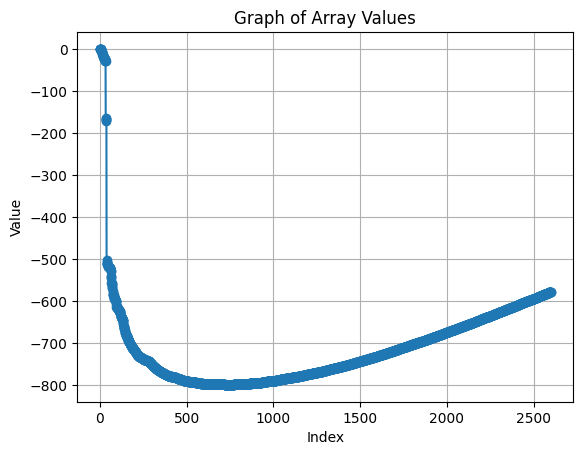

In [19]:
import matplotlib.pyplot as plt
x = range(len(regret))

# Plotting
plt.plot(x, regret, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Graph of Array Values')
plt.grid(True)
plt.show()